# Linear Discriminant Analysis

https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2

Maximize separability between classes  

线性判别分析是一种分类模型，它通过在k维空间选择一个投影超平面，使得不同类别在该超平面上的投影之间的距离尽可能近，同时不同类别的投影之间的距离尽可能远，在LDA中，我们假设每一个类别的数据服从高斯分布，且具有相同协方差矩阵Σ。  
此外，由于LDA会将k维数据投影到k-1维的超平面，因此也具有demension reduction的作用。不同于PCA会选择数据变化最大的方向，LDA会主要以类别为思考因素，使得投影后的样本尽可能可分。属于有监督学习。

In [1]:
from IPython.display import Video
Video("Linear Discriminant Analysis.mp4", embed = True)

### Within Class Scatter Matrix & Between Class Scatter Matrix

load dataset from 754a_C2S_Beimu.txt
X.shape (180, 1679)  y.shape (180,)


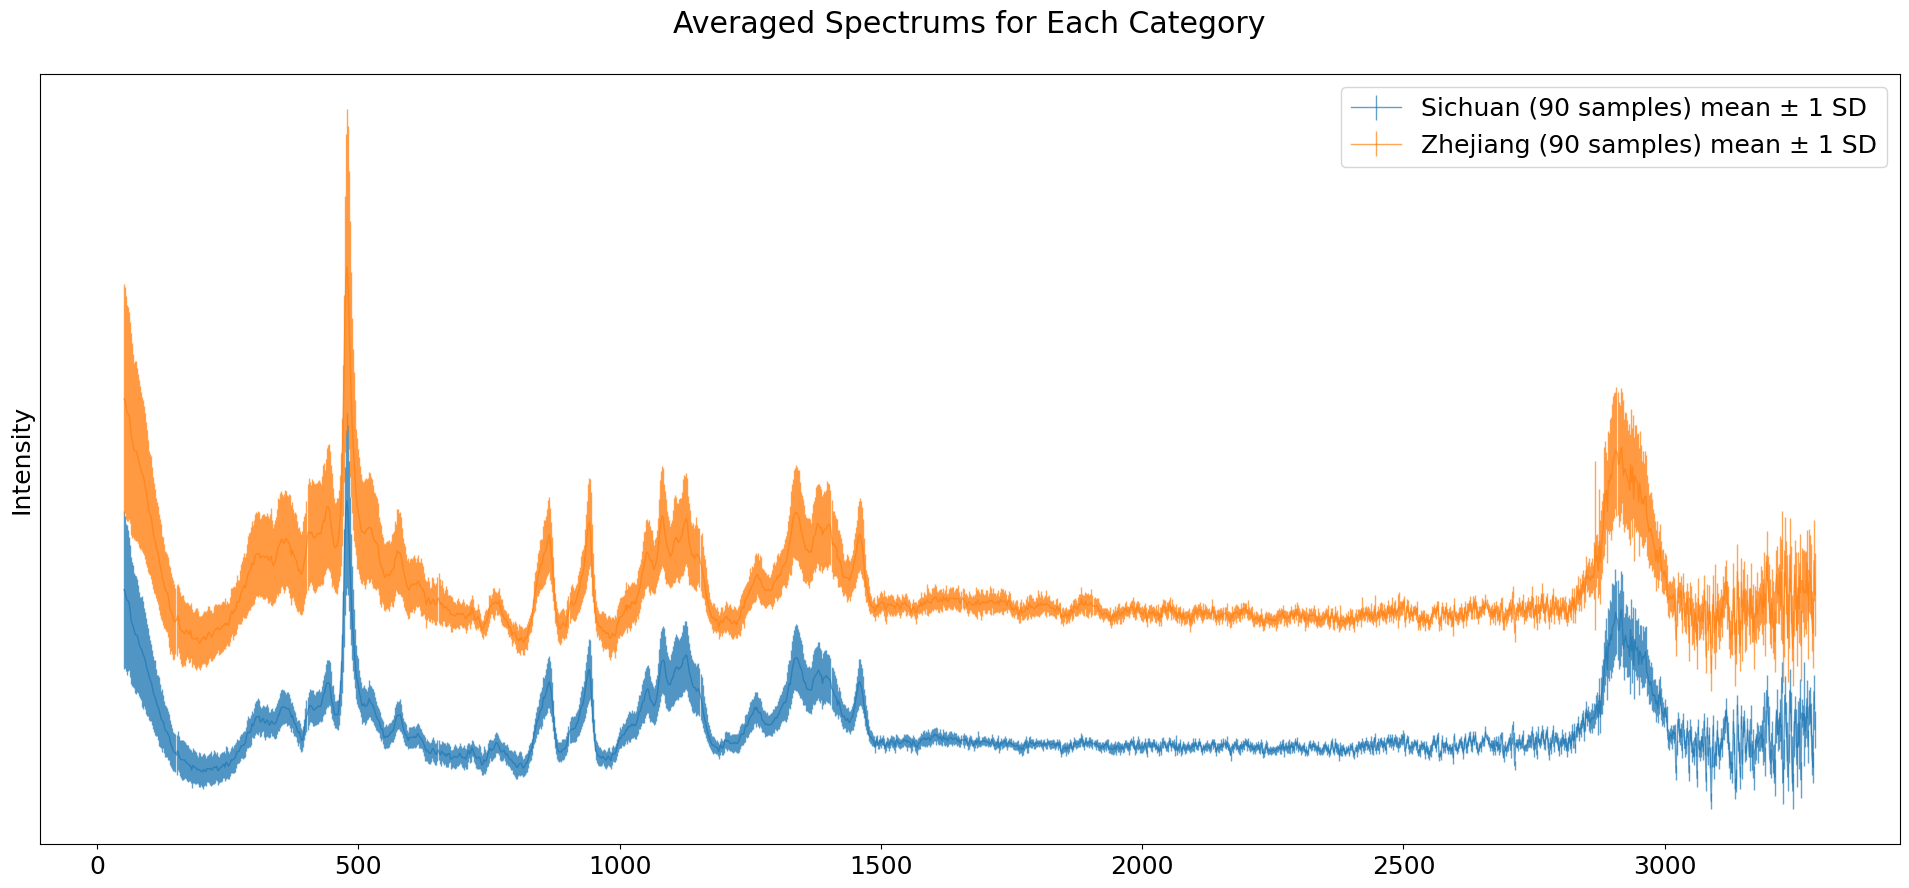

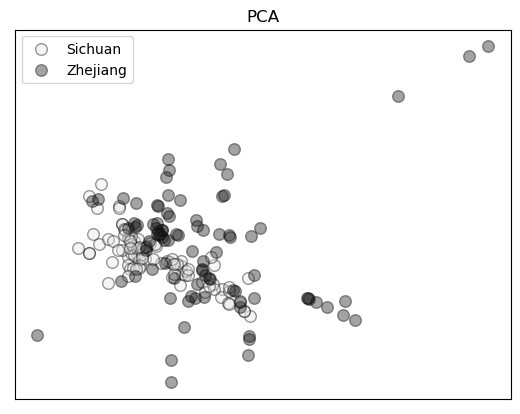

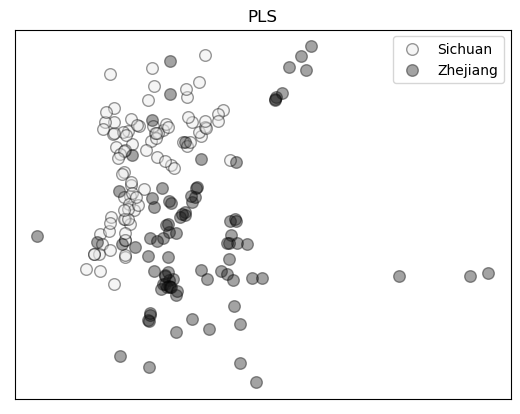

Data Set ID: 754a 川贝母、浙贝母拉曼光谱

["川贝母","浙贝母"] 90 samples per class

COLLECTION AND PROCESSING INFORMATION
Title: Position X =-12643 Y = 6208, Signal to noise ratio =24.6
Collected: Wed Mar 23 14:18:22 2022 (GMT+08:00)
Filename: C:\my documents\omnic\GFJ\20220323\chuanbeimu9 23-3-2022 14-9-54.CSV
Comments: 
Custom info 1: 
Custom info 2: 
DATA DESCRIPTION
 Number of points: 1682
 X-axis: Raman shift (cm-1)
 Y-axis: Raman intensity
 First X value: 49.6820
 Last X value: 3291.4346
 Raman laser frequency: 12738.9932
 Data spacing: 1.928467
DATA COLLECTION INFORMATION
 Exposure time: 0.1429 sec
 Number of exposures: 600
 Number of background exposures: 600
SPECTROMETER DESCRIPTION
 Spectrometer: DXR Raman Microscope
 Bench serial number: AXX1916142
 Laser: 785 nm
 Laser serial number: BAB1910322
 Laser power level: 19.0 mW
 Filter: 785 nm
 Filter serial number: BAL1910361
 Grating: 400 lines/mm
 Grating serial number: BAC1910373
 Spectrograph aperture: 50 µm pinhole
 Camera at temperature




In [4]:
from qsi import io
X, y, X_names, _, labels = io.load_dataset('beimu')

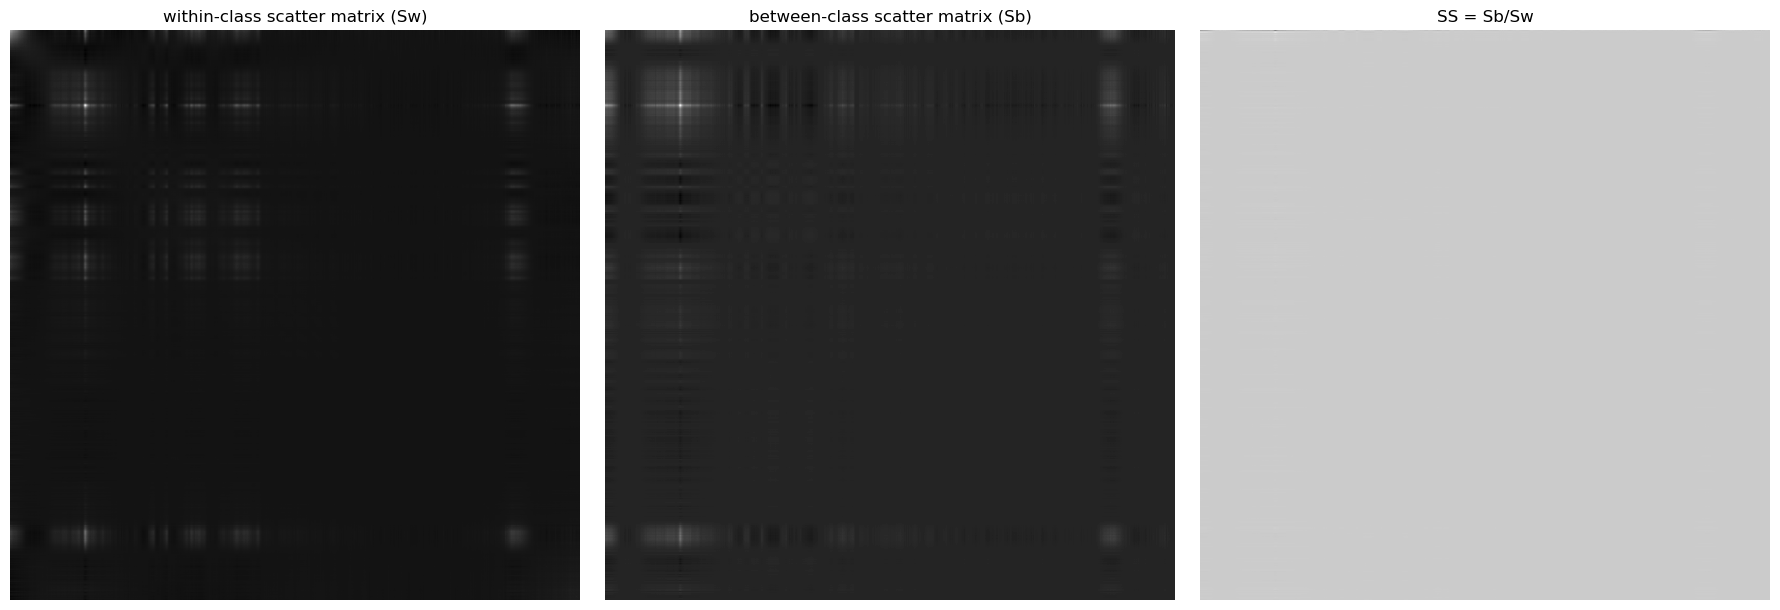

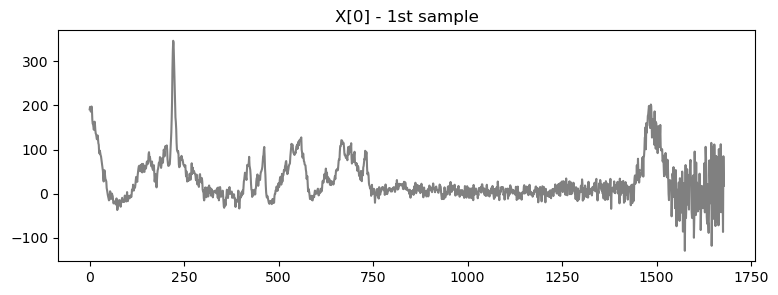

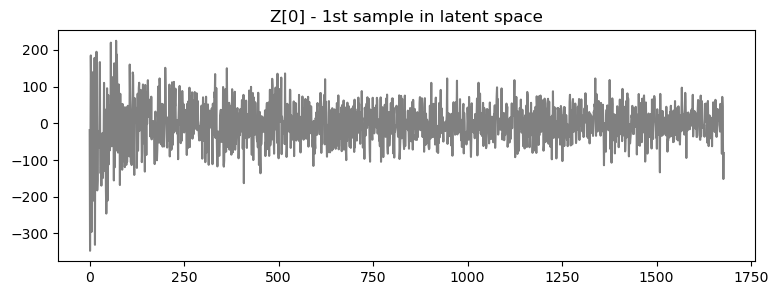

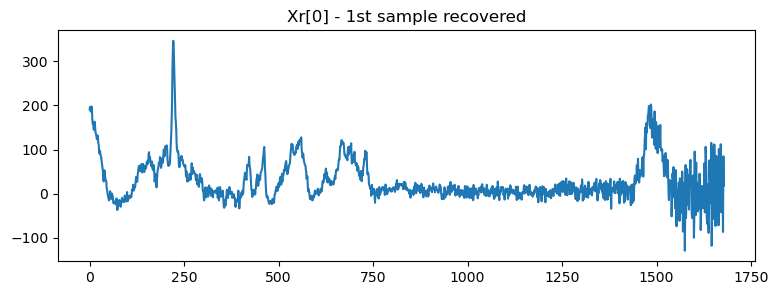

In [6]:
from cs1.basis.adaptive import LDA
PSI, Z, Xr = LDA(X[1:], y[1:], display = True) # spare the 1st sample for testing

Z = X @ U is not sparse!

<AxesSubplot:>

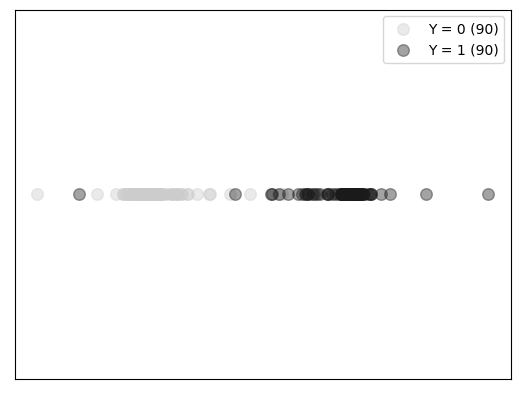

In [16]:
from qsi.vis.plot_components import plot_components_1d
plot_components_1d(Z, y)

## sklearn.discriminant_analysis.LinearDiscriminantAnalysis

solver : string, optional  -  Solver to use, possible values:  
‘svd’: Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features.  
‘lsqr’: Least squares solution, can be combined with shrinkage.  
‘eigen’: Eigenvalue decomposition, can be combined with shrinkage.  

n_components : int, optional  -  Number of components (< n_classes - 1) for dimensionality reduction.


LDA (at least the implementation in sklearn) can produce at most k-1 components (where k is number of classes). So if you are dealing with binary classification - you'll end up with only 1 dimension. 

<AxesSubplot:>

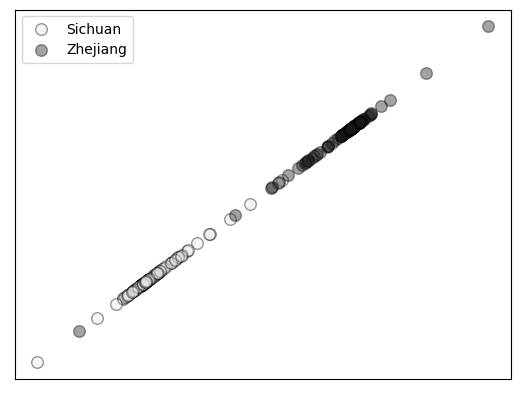

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

clf = LinearDiscriminantAnalysis(store_covariance = True, n_components = 1)
Z = clf.fit_transform(X, y)
plot_components_2d(np.hstack((Z,Z)), y, legends = labels)

# Use LDA in CS

non-zero coefs:  623


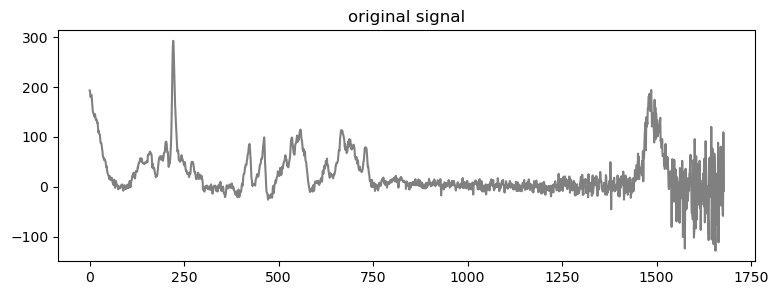

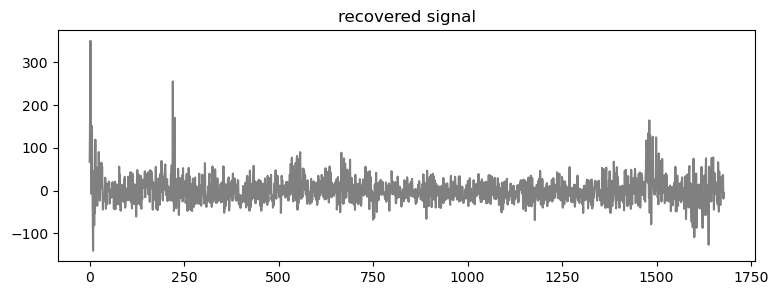

In [12]:
from cs1.basis.adaptive import LDA_Sensing_n_Recovery
LDA_Sensing_n_Recovery(PSI, X[0], k = 0.2)

non-zero coefs:  1614


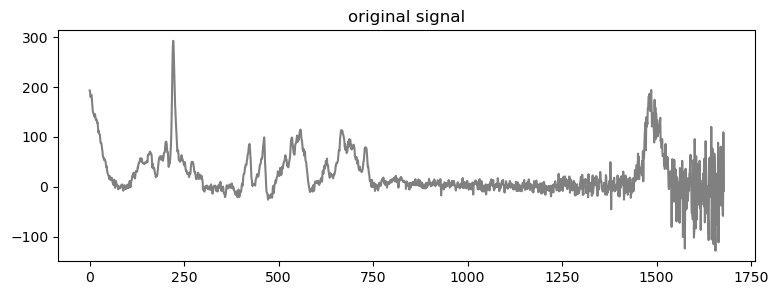

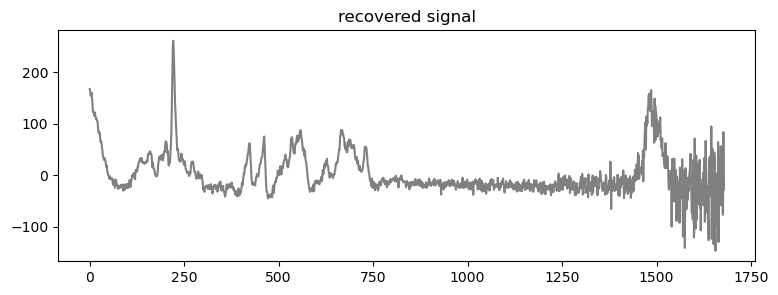

In [13]:
LDA_Sensing_n_Recovery(PSI, X[0], k=1)

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

## 其他LDA示例

0.9416666666666667
{'_max_components': 1,
 '_n_features_out': 1,
 'classes_': array([0., 1.]),
 'coef_': array([[-2.28304919, 13.69506768]]),
 'covariance_': array([[0.65979432, 0.18189496],
       [0.18189496, 0.10038896]]),
 'covariance_estimator': None,
 'explained_variance_ratio_': array([1.]),
 'intercept_': array([-5.70327739]),
 'means_': array([[-0.02028233,  0.01403643],
       [ 0.96773196,  0.97680415]]),
 'n_components': 1,
 'n_features_in_': 2,
 'priors': None,
 'priors_': array([0.5, 0.5]),
 'scalings_': array([[-0.6905823 ],
       [ 4.14251754]]),
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': True,
 'tol': 0.0001,
 'xbar_': array([0.47372481, 0.49542029])}


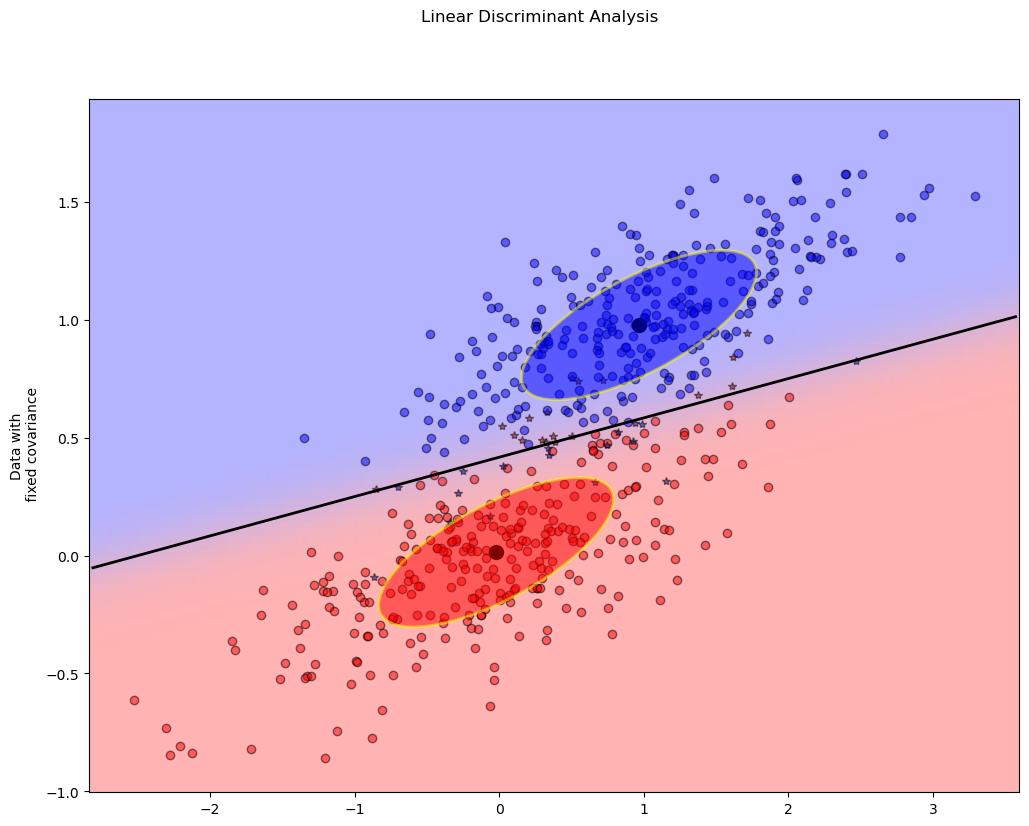

In [23]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
%matplotlib inline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred):
    fig,ax = plt.subplots(figsize=[12,9])
    
    plt.ylabel('Data with\n fixed covariance')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red', markeredgecolor='k')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000', markeredgecolor='k')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue', markeredgecolor='k')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099', markeredgecolor='k')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10, markeredgecolor='k')

    return ax

def plot_ellipse(ax, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='yellow',
                              linewidth=2, zorder=2)
    #ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)


# plots the covariance ellipsoids of each class and decision boundary learned by LDA.
def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


(X, y) = dataset_fixed_cov()
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True, n_components = 1)
y_pred = lda.fit(X, y).predict(X)
print(lda.score(X,y))

from pprint import pprint
pprint(vars(lda))

ax = plot_data(lda, X, y, y_pred)
plot_lda_cov(lda, ax)
plt.axis('tight')
    
plt.suptitle('Linear Discriminant Analysis')
plt.show()

### 示例：PCA vs LDA

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

PCA - explained variance ratio (first two components): [0.92461872 0.05306648]
LDA - explained variance ratio (first two components): [0.9912126 0.0087874]


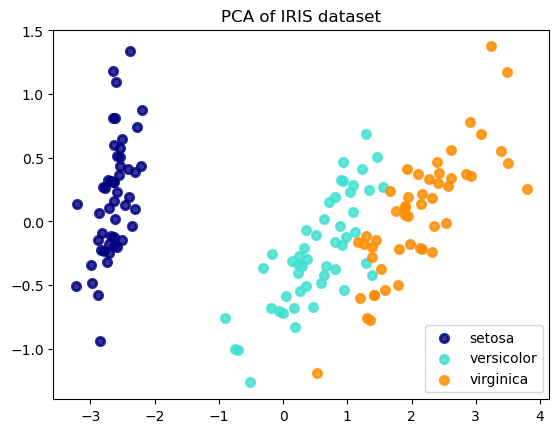

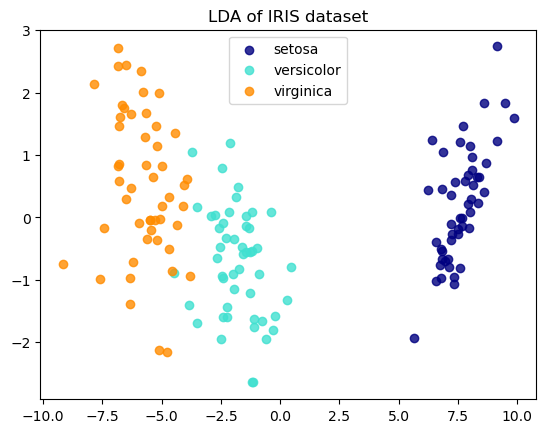

In [24]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('PCA - explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# Percentage of variance explained for each components
print('LDA - explained variance ratio (first two components): %s'
      % str(lda.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

## relation between linear regression and linear discriminant analysis

There is a considerable and meaningful relation between linear regression and linear discriminant analysis. In case the dependent variable (DV) consists just of 2 groups the two analyses are actually identical. Despite that computations are different and the results - regression and discriminant coefficients - are not the same, they are exactly proportional to each other.

Now for the more-than-two-groups situation. First, let us state that LDA (its extraction, not classification stage) is equivalent (linearly related results) to canonical correlation analysis if you turn the grouping DV into a set of dummy variables (with one redundant of them dropped out) and do canonical analysis with sets "IVs" and "dummies". Canonical variates on the side of "IVs" set that you obtain are what LDA calls "discriminant functions" or "discriminants".

So, then how canonical analysis is related to linear regression? Canonical analysis is in essence a MANOVA (in the sense "Multivariate Multiple linear regression" or "Multivariate general linear model") deepened into latent structure of relationships between the DVs and the IVs. These two variations are decomposed in their inter-relations into latent "canonical variates". Let us take the simplest example, Y vs X1 X2 X3. Maximization of correlation between the two sides is linear regression (if you predict Y by Xs) or - which is the same thing - is MANOVA (if you predict Xs by Y). The correlation is unidimensional (with magnitude R^2 = Pillai's trace) because the lesser set, Y, consists just of one variable. Now let's take these two sets: Y1 Y2 vs X1 x2 x3. The correlation being maximized here is 2-dimensional because the lesser set contains 2 variables. The first and stronger latent dimension of the correlation is called the 1st canonical correlation, and the remaining part, orthogonal to it, the 2nd canonical correlation. So, MANOVA (or linear regression) just asks what are partial roles (the coefficients) of variables in the whole 2-dimensional correlation of sets; while canonical analysis just goes below to ask what are partial roles of variables in the 1st correlational dimension, and in the 2nd.

Thus, canonical correlation analysis is multivariate linear regression deepened into latent structure of relationship between the DVs and IVs. Discriminant analysis is a particular case of canonical correlation analysis (see exactly how). So, here was the answer about the relation of LDA to linear regression in a general case of more-than-two-groups.

Note that my answer does not at all see LDA as classification technique. I was discussing LDA only as extraction-of-latents technique. Classification is the second and stand-alone stage of LDA 

# sklearn.discriminant_analysis.LinearDiscriminantAnalysis

The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.

The fitted model can also be used to reduce the dimensionality of the input by projecting it to *the most discriminative directions*, using the transform method.

For LDA(n_components), `n_components` cannot be larger than `min(n_features, n_classes - 1)`   
LDA generates n_components hyperplanes that seperate the n_classes

Inside `transform()`: 
```

        if self.solver == 'svd':
            X_new = np.dot(X - self.xbar_, self.scalings_)
        elif self.solver == 'eigen':
            X_new = np.dot(X, self.scalings_)

```

# Case Study: Wine.csv


1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results using the leave-one-out technique)

   In a classification context, this is a well posed problem 
   with "well behaved" class structures. A good data set 
   for first testing of a new classifier, but not very 
   challenging.

   (2) 
   S. Aeberhard, D. Coomans and O. de Vel,
   "THE CLASSIFICATION PERFORMANCE OF RDA"
   Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Journal of Chemometrics).

   Here, the data was used to illustrate the superior performance of
   the use of a new appreciation function with RDA. 

4. Relevant Information:

   -- These data are the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines. 

   -- I think that the initial data set had around 30 variables, but 
      for some reason I only have the 13 dimensional version. 
      I had a list of what the 30 or so variables were, but a.) 
      I lost it, and b.), I would not know which 13 variables
      are included in the set.

   -- The attributes are (dontated by Riccardo Leardi, 
	riclea@anchem.unige.it )
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline            

5. Number of Instances

      	class 1 59
	class 2 71
	class 3 48

6. Number of Attributes 
	
	13

7. For Each Attribute:

	All attributes are continuous
	
	No statistics available, but suggest to standardise
	variables for certain uses (e.g. for us with classifiers
	which are NOT scale invariant)

	NOTE: 1st attribute is class identifier (1-3)

8. Missing Attribute Values:

	None

9. Class Distribution: number of instances per class

      	class 1 59
	class 2 71
	class 3 48


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('wine.csv')

X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [30]:
vars(lda)

{'solver': 'svd',
 'shrinkage': None,
 'priors': None,
 'n_components': 2,
 'store_covariance': False,
 'tol': 0.0001,
 'covariance_estimator': None,
 'n_features_in_': 13,
 'classes_': array([1, 2, 3], dtype=int64),
 'priors_': array([0.31205674, 0.39716312, 0.29078014]),
 '_max_components': 2,
 'means_': array([[ 0.92265467, -0.31765474,  0.4200317 , -0.68999884,  0.42441328,
          0.86139652,  0.98245874, -0.53754164,  0.56618797,  0.20943947,
          0.54305307,  0.79938205,  1.19163513],
        [-0.88154491, -0.41233764, -0.53301324,  0.12511982, -0.29318672,
          0.0277533 ,  0.10397953, -0.15175868,  0.10900956, -0.86745884,
          0.41348527,  0.28982142, -0.6849843 ],
        [ 0.21389534,  0.90409065,  0.27725235,  0.5695912 , -0.05501775,
         -0.96233247, -1.19636678,  0.7841541 , -0.75650747,  0.96005752,
         -1.14754903, -1.25372706, -0.34323962]]),
 'xbar_': array([ 1.07067133e-14, -2.77555756e-16,  5.55111512e-17, -2.22044605e-16,
        -1.2836

In [31]:
lda.scalings_.shape, lda.coef_.shape

((13, 2), (3, 13))

scalings_为components的loadings, coef_和intercept_为decision boundary